
# **Declaração do problema:

## **Vamos explorar e analisar o conjunto de dados e encontrar algumas informações (Algumas perguntas listadas abaixo).

### O que podemos aprender sobre os diferentes hosts e areas?
### O que aprendemos sobre o tipo de quarto e seus preços de acordo com a area?
### O que podemos aprender com os dados?(ex: locations, prices, reviews, etc)
### Quais são os hosts mais ocupados e qual é a razão?
### Quais Hosts estão cobrando preços mais altos?
### Existe alguma diferença de tráfego entre as diferentes áreas e qual poderia ser a razão para isso?
### Qual é a correlação entre diferentes variáveis?
### Qual é a contagem de quartos em toda a cidade de Nova York de acordo com a listagem dos tipos de quarto?

#### Importing Libraries


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Reading DataSet

In [26]:
df = pd.read_csv("Airbnb NYC 2019.csv")

#### Data Description & Information

In [3]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [27]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Dropping the unnecessary columns 

In [29]:
df.drop(['latitude','longitude', 'last_review','reviews_per_month'],axis = 1, inplace = True)
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,Entire home/apt,200,3,74,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,Private room,60,45,49,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,Private room,79,2,430,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,Private room,79,2,118,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,Entire home/apt,150,1,160,4,188


#### Question 1

In [30]:
host_areas = df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
host_areas.sort_values(by = 'calculated_host_listings_count', ascending = False).head(10)

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1834,Blueground,Manhattan,232
1833,Blueground,Brooklyn,232
7275,Kara,Manhattan,121
7480,Kazuya,Queens,103
7479,Kazuya,Manhattan,103
7478,Kazuya,Brooklyn,103
13216,Sonder,Manhattan,96
6540,Jeremy & Laura,Manhattan,96
2901,Corporate Housing,Manhattan,91


#### Question 2

In [32]:
room_price_area_wise = df.groupby(['neighbourhood_group','room_type'])['price'].max().reset_index()
room_price_area_wise.sort_values(by='price',ascending = False).head(10)

,neighbourhood_group,room_type,price
3,Brooklyn,Entire home/apt,10000
6,Manhattan,Entire home/apt,10000
10,Queens,Private room,10000
7,Manhattan,Private room,9999
4,Brooklyn,Private room,7500
12,Staten Island,Entire home/apt,5000
9,Queens,Entire home/apt,2600
1,Bronx,Private room,2500
11,Queens,Shared room,1800
0,Bronx,Entire home/apt,1000


### Visualize the data

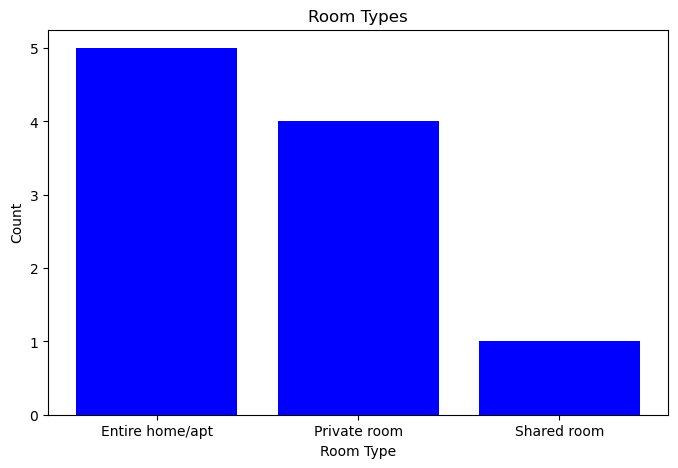

In [34]:
neighbourhood_group = ['Brooklyn', 'Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Staten Island', 'Queens', 'Bronx', 'Queens', 'Bronx']
room_type = ['Entire home/apt', 'Entire home/apt', 'Private room', 'Private room', 'Private room', 'Entire home/apt', 'Entire home/apt', 'Private room', 'Shared room', 'Entire home/apt']

room_dict = {} #Crie um dicionário chamado room_dict para armazenar a contagem de cada tipo de quarto. Percorra a lista room_type e aumente a contagem do tipo de quarto no dicionário, se já existir. Caso contrário, adicione o tipo de quarto como uma chave com a contagem de 1.

for i in room_type:
    room_dict[i] = room_dict.get(i,0) +1

plt.bar(room_dict.keys(), room_dict.values(), color = 'blue')
plt.title('Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

#### Question 3

In [12]:
area_reviews = df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
area_reviews

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


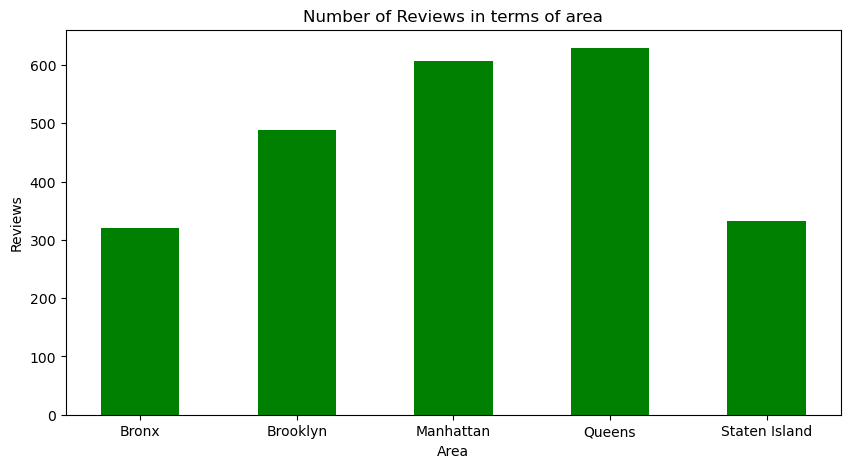

In [13]:
area = area_reviews['neighbourhood_group']
review = area_reviews['number_of_reviews']
fig = plt.figure(figsize = (10,5))

plt.bar(area, review, color = 'green', width = 0.5)
plt.title("Number of Reviews in terms of area")
plt.xlabel('Area')
plt.ylabel('Reviews')
plt.show()

In [14]:
price_area = df.groupby(['price'])['number_of_reviews'].max().reset_index()

In [15]:
price_area.head(10)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9
5,15,19
6,16,43
7,18,1
8,19,76
9,20,116


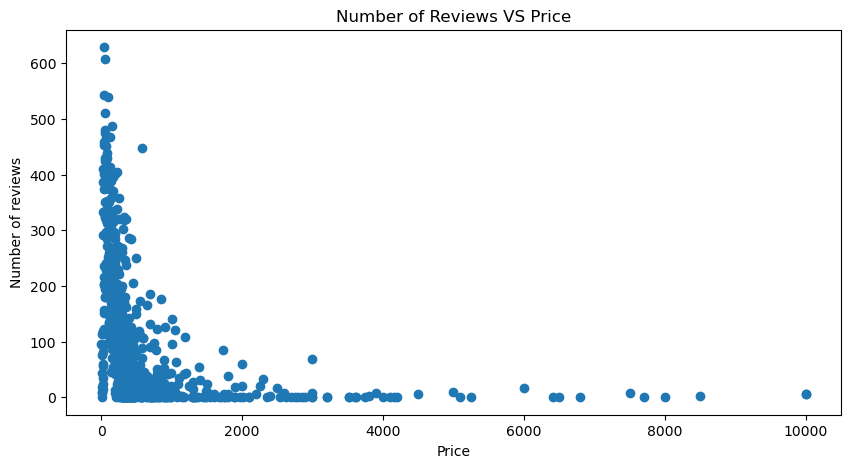

In [36]:
price_list = price_area['price']
review = price_area['number_of_reviews']
fig =plt.figure(figsize =(10,5))

plt.scatter(price_list, review)
plt.xlabel('Price')
plt.ylabel('Number of reviews')
plt.title('Number of Reviews VS Price')
plt.show()

#### Question 4

In [17]:
busy_hosts = df.groupby(['host_id','host_name','room_type'])['number_of_reviews'].max().reset_index()
busy_hosts = busy_hosts.sort_values(by = 'number_of_reviews', ascending =False).head(10)
busy_hosts

,host_id,host_name,room_type,number_of_reviews
24484,47621202,Dona,Private room,629
7707,4734398,Jj,Private room,607
22213,37312959,Maya,Private room,543
4590,2369681,Carol,Private room,540
19443,26432133,Danielle,Private room,510
13707,12949460,Asa,Entire home/apt,488
1974,792159,Wanda,Private room,480
5056,2680820,Linda,Private room,474
161,42273,Dani,Entire home/apt,467
18289,23591164,Angela,Private room,466


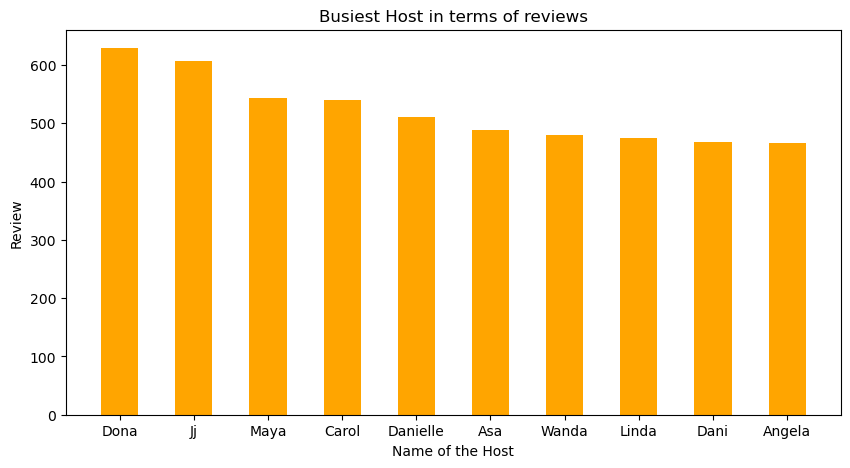

In [37]:
name_hosts = busy_hosts['host_name']
review_got = busy_hosts['number_of_reviews']

fig = plt.figure(figsize =(10,5))

plt.bar(name_hosts,review_got, color ='orange', width =0.5)
plt.xlabel('Name of the Host')
plt.ylabel('Review')
plt.title("Busiest Host in terms of reviews")
plt.show()

#### Question 5

In [19]:
Highest_price= df.groupby(['host_id','host_name','room_type','neighbourhood_group'])['price'].max().reset_index()
Highest_price= Highest_price.sort_values(by = 'price', ascending =False).head(10)
Highest_price

,host_id,host_name,room_type,neighbourhood_group,price
27920,72390391,Jelena,Entire home/apt,Manhattan,10000
17060,20582832,Kathrine,Private room,Queens,10000
8055,5143901,Erin,Entire home/apt,Brooklyn,10000
7325,4382127,Matt,Entire home/apt,Manhattan,9999
2659,1235070,Olson,Entire home/apt,Manhattan,9999
6628,3906464,Amy,Private room,Manhattan,9999
16096,18128455,Rum,Entire home/apt,Manhattan,8500
2561,1177497,Jessica,Entire home/apt,Brooklyn,8000
33424,156158778,Sally,Entire home/apt,Manhattan,7703
10113,7407743,Jack,Entire home/apt,Manhattan,7500


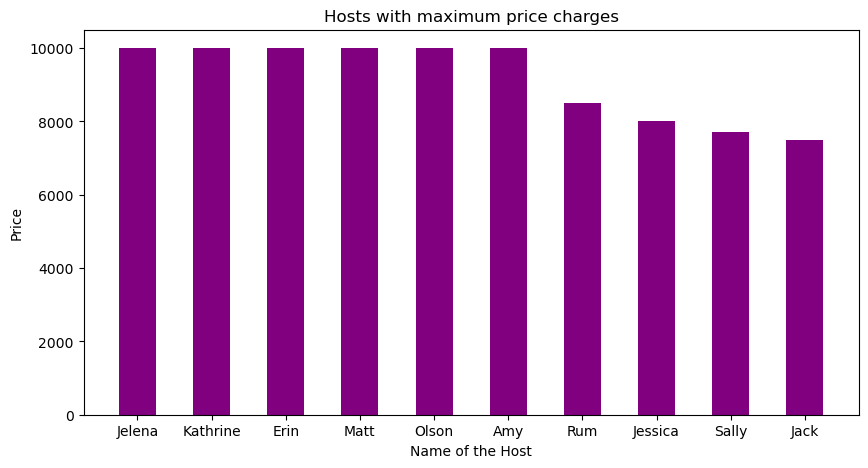

In [38]:
name_of_host = Highest_price ['host_name']
price_charge = Highest_price['price']

fig = plt.figure(figsize =(10,5))

plt.bar(name_of_host,price_charge , color ='purple', width =0.5)
plt.xlabel('Name of the Host')
plt.ylabel('Price')
plt.title("Hosts with maximum price charges")
plt.show()

#### Question 6

In [21]:
traffic_areas = df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traffic_areas = traffic_areas.sort_values(by ='minimum_nights',ascending = False).head(10)
traffic_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


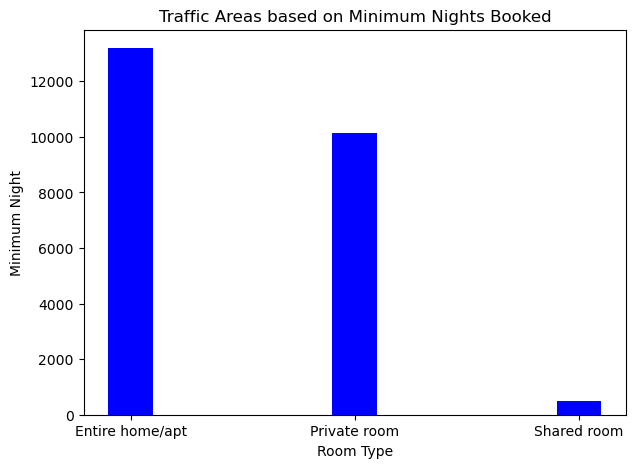

In [40]:
areas_Traffic = traffic_areas['room_type']
room_stayed = traffic_areas['minimum_nights']

fig = plt.figure(figsize =(7,5))

plt.bar(areas_Traffic,room_stayed, color ="blue", width = 0.2)

plt.xlabel("Room Type")
plt.ylabel("Minimum Night")
plt.title("Traffic Areas based on Minimum Nights Booked")
plt.show()

#### Question 7

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

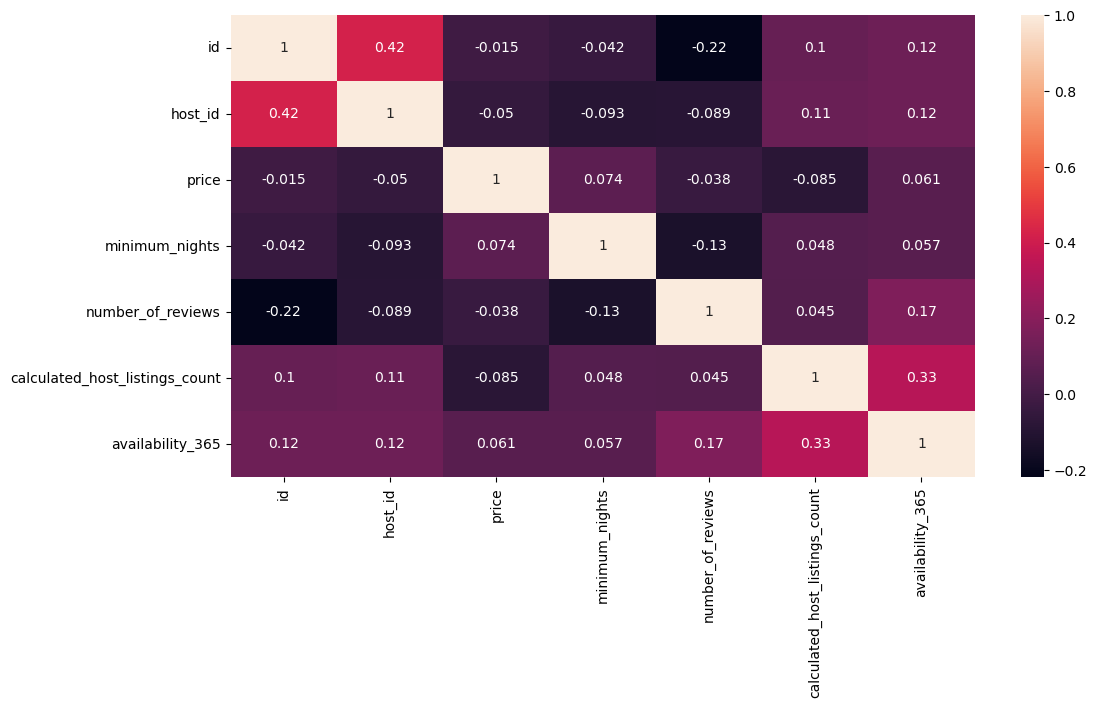

In [41]:
corr = df.corr(method= "kendall")
fig = plt.figure(figsize = (12,6))
sns.heatmap(corr, annot = True)
df.columns

#### Question 8

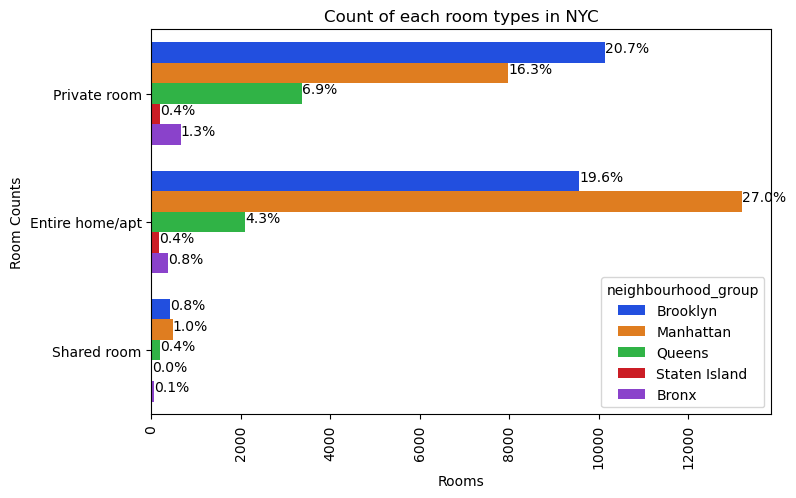

In [43]:
plt.rcParams['figure.figsize'] = (8, 5)
ax= sns.countplot(y='room_type',hue='neighbourhood_group',data=df,palette='bright')

total = len(df['room_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('Count of each room types in NYC')
plt.xlabel('Rooms')
plt.xticks(rotation=90)
plt.ylabel('Room Counts')

plt.show()

## **Conclusão:**
Conclusão:

Descobrimos que o nome do Host "Sonder (NYC)" tem o maior número de listagens em Manhattan, seguido por Blueground.

Descobrimos que "Casa/Apt Inteiro" é o tipo de quarto com o maior número de listagens em geral e que os preços são mais altos em Brooklyn e Manhattan para "Casa/Apt Inteiro".

A partir da visualização acima, podemos dizer que a maioria das pessoas gosta de ficar em lugares mais baratos e suas avaliações são mais altas nessas áreas.

Encontramos os anfitriões mais movimentados:
Dona, Ji, Maya, Carol, Danielle

Porque esses anfitriões listaram seus tipos de quartos como "Casa/Apt Inteiro" e "Quarto Privado", que são os preferidos pela maioria das pessoas e também suas avaliações são mais altas.

Agora vimos os 10 anfitriões que estão cobrando o preço máximo:
Jelena, Kathrine, Erin, Matt, Olson, Amy, Rum, Jessica, Sally e Jack
Preço máximo é 10000 USD.

A partir desta visualização, descobrimos que a maioria das pessoas gosta de ficar em "Casa/Apt Inteiro" e "Quarto Privado", que estão presentes em Manhattan, Brooklyn e Queens, e também os visitantes preferem ficar em quartos que possuem preços mais baixos.

Vimos todas as correlações entre diferentes variáveis.

Manhattan tem mais propriedades listadas com "Casa/Apt Inteiro", cerca de 27% do total de propriedades listadas, seguida por Brooklyn com cerca de 19,6%. Quartos privados são mais comuns em Brooklyn, com 20,7% do total de propriedades listadas, seguida por Manhattan com 16,3% delas. Enquanto 6,9% dos quartos privados são de Queens. Podemos inferir que Brooklyn, Queens e Bronx possuem mais tipos de quartos privados, enquanto Manhattan, que possui o maior número de listagens em toda a cidade de Nova York, possui mais tipos de "Casa/Apt Inteiro".